
# Detecting Credit Card Fraud
Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones fraudulentas de tarjetas de crédito para que no se cobre a los clientes por artículos que no compraron. Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones. El objetivo de este proyecto es construir un modelo capaz de reconocer transacciones fraudulentas con tarjetas de crédito. Más información [aquí](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Comienzo analizando la estructura de los datasets:

In [ ]:
import pandas as pd

transactions_a = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_a.csv")
transactions_a.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
transactions_b = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_b.csv")
transactions_b.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127895,0.155432,-0.513165,0.348025,-2.290819,0.412328,0.537240,0.076755,-0.072367,-0.343188,0.104174,-0.321220,0.571147,1.309915,-0.605100,0.625946,-2.554348,0.493100,-0.528454,-1.833773,-0.575761,-0.228727,0.264679,0.154866,-1.067183,-1.192413,0.735726,-0.154075,-0.200072,30.43,0
1,127895,0.144968,0.984625,-0.469259,-0.559418,0.898427,-0.774439,0.966555,-0.079312,0.029686,-0.826361,-0.871466,-0.412111,-0.453984,-0.927580,-0.178107,0.387905,0.352905,-0.118290,-0.185641,0.005702,-0.350727,-0.894781,0.103029,0.458925,-0.419840,0.120432,0.216811,0.082648,9.98,0
2,127895,-0.611349,1.283775,-1.974043,-1.655406,2.984231,3.506069,-0.214317,-0.632051,0.167111,-0.349975,0.142923,-0.022516,-0.474807,-0.768190,0.137271,0.205844,0.470750,-0.364727,-0.459973,-0.159635,1.160112,-1.450777,0.343309,0.560751,-0.335527,0.181544,0.424852,0.145803,1.98,0
3,127895,1.836002,-1.291509,-1.777315,-0.937930,-0.474535,-0.957642,0.010062,-0.324263,-0.882252,0.953930,0.760575,-0.207727,-0.291802,0.467876,-0.363638,1.206906,-0.156158,-1.058576,1.043532,0.353039,0.190313,-0.002319,-0.013476,-0.410082,-0.131701,-0.329364,-0.092481,-0.042942,210.00,0
4,127895,2.013508,0.171357,-2.245188,0.936324,0.243521,-1.389765,0.106378,-0.197682,1.011673,-1.013011,-0.633415,-1.119080,-2.141120,-2.258806,-0.133473,0.386417,2.178073,0.787383,-0.306929,-0.268419,-0.036278,0.138471,-0.027367,-0.273424,0.133993,0.739868,-0.046538,-0.016684,12.31,0


Analizo si los datasets son continuos viendo la continuidad del atributo Time:

In [ ]:
print(transactions_a.shape, transactions_b.shape)
print(pd.concat([transactions_a[-3:], transactions_b[:3]], axis=0))

(188261, 31) (96546, 31)
            Time        V1        V2  ...       V28  Amount  Class
188258  127894.0  2.097886 -0.685229  ... -0.057214   11.50      0
188259  127894.0  1.851731 -0.368532  ... -0.013513   45.00      0
188260  127894.0  1.759307 -0.459599  ... -0.017127   93.34      0
0       127895.0  0.155432 -0.513165  ... -0.200072   30.43      0
1       127895.0  0.144968  0.984625  ...  0.082648    9.98      0
2       127895.0 -0.611349  1.283775  ...  0.145803    1.98      0

[6 rows x 31 columns]


Uno los datasets en uno solo:

In [ ]:
df = pd.concat([transactions_a, transactions_b], axis=0, ignore_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Grafico el histograma de cada atributo para conocer su distribución:

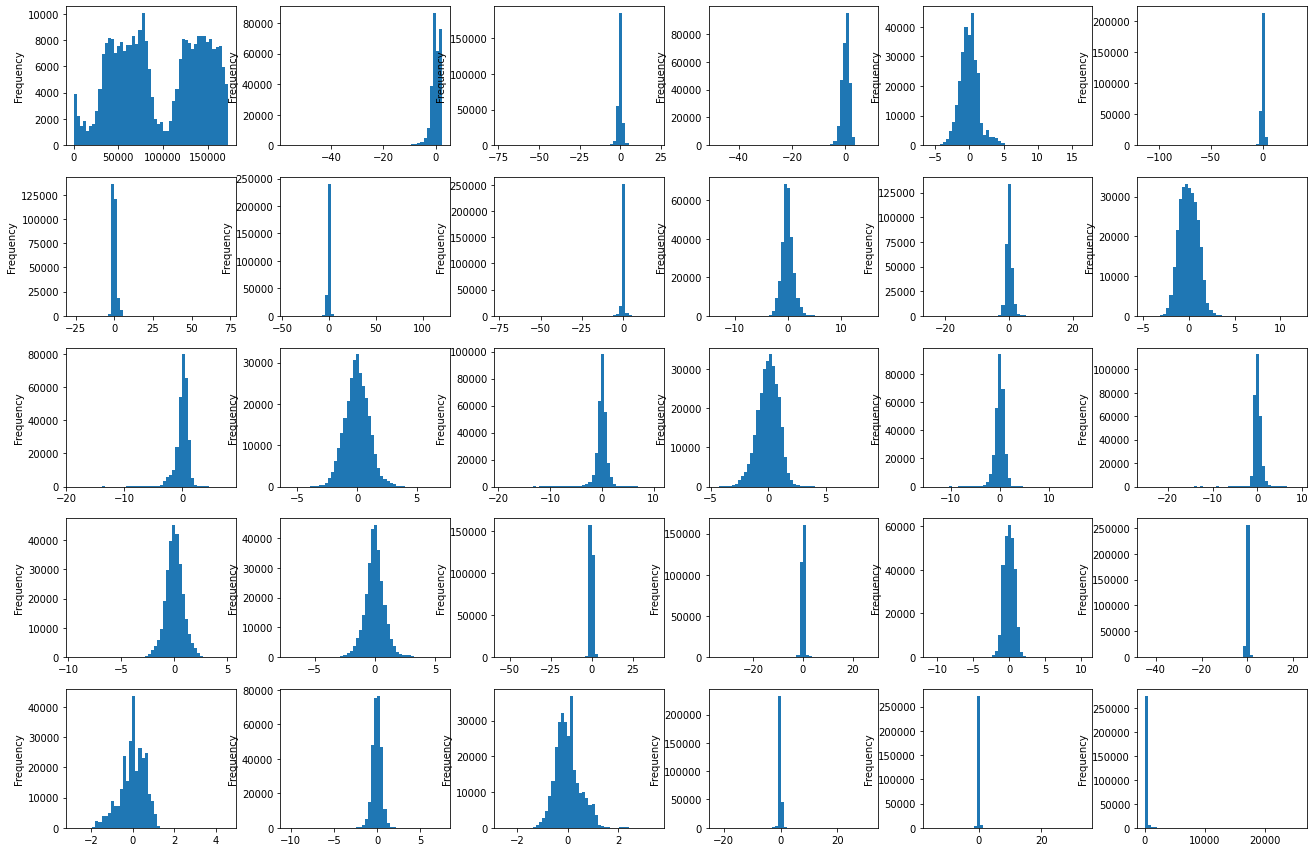

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,12))
fig.tight_layout()
for r,c in np.ndindex((5,6)):
    df[df.columns[6*r+c]].plot.hist(bins=50, ax=axes[r,c])
    axes[r,c].set_title(df.columns[6*r+c])

En primer lugar, determino los atributos a usar. En cuanto al tiempo, podría existir una correlación entre éste y el hecho de que sea un fraude, como por ejemplo que los fraudes ocurren mayoritariamente en un cierto rango de horarios. Pero este atributo está referenciado al primer registro del dataset, por lo que no indica un horario del día si no la cantidad de segundos desde dicha transacción. Por ahora se deja de lado y no se utiliza en el modelo.
En cuanto al monto, es muy probable que exista una correlación de éste con el target, por lo que sí es considerado en el modelo.

Entre los modelos a utilizar, SVM, Random Forest y Perceptrones podrían ser buenas opciones. Se implementan las 3 opciones y se compara el desempeño. Dado que el dataset tiene un tamaño considerable, se tiene en cuenta el tiempo de entrenamiento.

# Clasificación con Random Forest

Se comienza utilizando Random Forest debido a que el tiempo de entrenamiento es generalmente reducido y los resultados pueden ser bastante buenos. Así, se obtendrá un punto de partida para comparar el resto de los modelos.

Como score del modelo utilizo el valor F1, ya que utilizar la exactitud (o accuracy, el cual es el score por defecto) no sería bueno cuando las clases están tan desbalanceadas. Al utilizar el valor F1 se asume que los falsos positivos (precision) y los falsos negativos (recall) tienen el mismo peso. En la práctica esto podría no ser así, pero como no conozco los costos relativos asumo pesos iguales.

Comienzo separando el dataset y normalizando los datos:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Parámetros para separar y normalizar el dataset
test_fraction = 0.2

# Separo el dataset en entrenamiento y validación
X_train,  X_test,  y_train,  y_test  = train_test_split(df.drop(['Time', 'Class'], axis=1), df.Class, test_size=test_fraction, random_state=0)

# Estandarizo los datos a media 0 y varianza 1
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Antes de utilizar GridSearch, se analiza el tiempo de entrenamiento ante un único conjunto de hiperparámetros:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': [30]}
gs = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


El tiempo de ejecución es razonable como para probar varias configuraciones. Utilizo entonces GridSearch para buscar los mejores hiperparámetros del modelo:

In [ ]:
# Defino los parámetros a utilizar en GridSearch
grid_params = {'n_estimators': [15, 30, 50, 75, 100], 'criterion': ['gini', 'entropy']}

# Corro el Grid Search especificando 'cv' para que los folds sean estratificados (ya que las clases están muy desbalanceadas)
gs = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
for key, value in gs.cv_results_.items():
    print(key, ':', value)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 53.9min finished


mean_fit_time : [ 38.86550293  79.68537588 134.24967036 199.91030278 264.15264001
  32.87180862  63.38272491 105.59447007 158.74079237 199.438728  ]
std_fit_time : [ 2.72539921  2.9238423   4.26412779  6.62634389  6.32046757  1.30198061
  1.61224307  2.43973886  4.27678871 25.38439672]
mean_score_time : [0.25908613 0.35773907 0.46232905 0.58704228 0.74682541 0.17887311
 0.2752933  0.35914426 0.4815475  0.59731779]
std_score_time : [0.00324746 0.00430308 0.00472946 0.04498082 0.0413786  0.04107394
 0.04136203 0.00398932 0.03993993 0.15383733]
param_criterion : ['gini' 'gini' 'gini' 'gini' 'gini' 'entropy' 'entropy' 'entropy'
 'entropy' 'entropy']
param_n_estimators : [15 30 50 75 100 15 30 50 75 100]
params : [{'criterion': 'gini', 'n_estimators': 15}, {'criterion': 'gini', 'n_estimators': 30}, {'criterion': 'gini', 'n_estimators': 50}, {'criterion': 'gini', 'n_estimators': 75}, {'criterion': 'gini', 'n_estimators': 100}, {'criterion': 'entropy', 'n_estimators': 15}, {'criterion': 'entr

Para mayor claridad, se muestran algunos parámetros del resultado:

In [ ]:
print('Criterion:', ['G' if x=='gini' else 'E' for x in gs.cv_results_['param_criterion']])
print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

Criterion: ['G', 'G', 'G', 'G', 'G', 'E', 'E', 'E', 'E', 'E']
N° of estimators: [15 30 50 75 100 15 30 50 75 100]
Mean test score:     [0.85  0.845 0.846 0.848 0.844 0.845 0.843 0.845 0.851 0.848]
Std test score:      [0.012 0.018 0.018 0.014 0.021 0.018 0.021 0.024 0.023 0.023]
Mean fit time (min): [0.648 1.328 2.237 3.332 4.403 0.548 1.056 1.76  2.646 3.324]


Analizando estos resultados se puede ver que el score promedio prácticamente no varía con los parámetros, aunque sí varía significativamente el tiempo de entrenamiento. Utilizar la entropía de Shannon es un 25% más rápido que usar la impureza de Gini (aprox.), y además el tiempo escala casi linealmente con la cantidad de árboles. Por esto, parecería conveniente utilizar la entropía (como método de selección de atributos) y además ir disminuyendo la cantidad de árboles hasta encontrar el punto en el que comienza a deteriorarse el funcionamiento. Aun así, se seguirá considerando la impureza de Gini dado que el punto donde comienza a deteriorarse el desempeño puede ser diferente a cuando se utiliza la entropía.

In [ ]:
grid_params = {'n_estimators': [1, 3, 5, 8, 10, 12, 15], 'criterion': ['gini', 'entropy']}
gs = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

print('Criterion:', ['G' if x=='gini' else 'E' for x in gs.cv_results_['param_criterion']])
print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 10.6min finished


Criterion: ['G', 'G', 'G', 'G', 'G', 'G', 'G', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
N° of estimators: [1 3 5 8 10 12 15 1 3 5 8 10 12 15]
Mean test score:     [0.721 0.829 0.839 0.834 0.84  0.848 0.85  0.718 0.822 0.836 0.833 0.833
 0.836 0.845]
Std test score:      [0.024 0.013 0.019 0.033 0.022 0.019 0.012 0.008 0.024 0.021 0.021 0.02
 0.017 0.018]
Mean fit time (min): [0.04  0.124 0.213 0.338 0.423 0.513 0.644 0.04  0.109 0.173 0.276 0.349
 0.42  0.502]


Parecería notarse que el score del modelo mejora lentamente al aumentar la cantidad de estimadores desde 3 hasta 15, y considerando los resultados anteriores, parecería que desde 15 en adelante no se encuentran mejoras. Por otro lado, no hay diferencias significativas entre utilizar la impureza de Gini y la entropía de Shannon, aunque podría decirse que se obtienen resultados ligeramente mejores con la impureza de Gini. Dado que no se está buscando un modelo especialmente rápido de entrenar, se selecciona el mejor modelo (criterion='gini', n_estimators=15) el cual requiere un tiempo de entrenamiento menor a 1 min (39s). 

A continuación se analizan algunas métricas del modelo con el set de testeo:

Recall: 0.792
Precision: 0.92
F1 score: 0.851 



Text(33.0, 0.5, 'Truth')

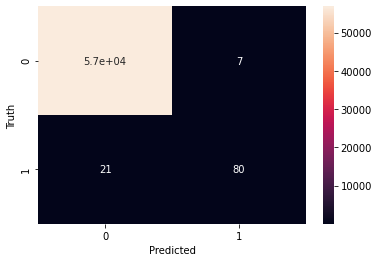

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

rfc_best = RandomForestClassifier(n_estimators=15, criterion='gini', n_jobs=-1, random_state=0)
rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)

print('Recall:', np.round(recall_score(y_test, y_pred), 3))
print('Precision:', np.round(precision_score(y_test, y_pred), 3))
print('F1 score:', np.round(f1_score(y_test, y_pred), 3), '\n')

# Grafico la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Como se puede ver, de los 101 fraudes que hay en el set de testeo, 80 fueron detectados (79.2%). Por otro lado, de las 87 detecciones de fraude, 80 eran realmente fraudes (92%).

# Clasificación con SVM

Los datos ya se encuentran separados y estandarizados, por lo que se comienza utilizando GridSearch para buscar los mejores hiperparámetros del modelo. En primer lugar, se desconoce cuánto tarda en entrenarse el modelo (se sabe que el tiempo de entrenamiento de SVM puede ser grande), por lo que se entrena el modelo con un único conjunto de hiperparámetros y se evalúa el tiempo que tarda.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid_params = {'C': [1], 'kernel': ['linear'], 'class_weight': ['balanced']}
gs = GridSearchCV(SVC(cache_size=500), grid_params, scoring='f1', verbose=1, cv=3, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

for key, value in gs.cv_results_.items():
    print(key, ':', value)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 48.3min finished


En el bloque anterior de código ocurrieron algunos problemas. Si no se especifica "cache_size", el código es muy lento: estuvo más de 1h entrenando y no terminó. Si se especifica cache_size pero no n_jobs, también es demasiado lento. Especificando los dos parámetros tarda 48 min, pero se queda trabado y no termina de ejecutarse nunca a pesar de que los mensajes de salida dicen que terminó. Cabe destacar que 1h no sería un tiempo muy grande, pero dado que no se tiene experiencia en el funcionamiento del algoritmo y cómo influyen los hiperparámetros, deberían probarse muchas configuraciones y esto llevaría días. Se continua por ahora intentando mejorar los resultados con otros modelos.

# Clasificación utilizando Perceptrón

Se comienza analizando el tiempo de entrenamiento:

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(Perceptron(), {}, scoring='f1', verbose=1, cv=5)
gs_results = gs.fit(X_train, y_train)

for key, value in gs.cv_results_.items():
    print(key, ':', value)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


mean_fit_time : [0.40725603]
std_fit_time : [0.07260193]
mean_score_time : [0.02360206]
std_score_time : [0.00080985]
params : [{}]
split0_test_score : [0.80254777]
split1_test_score : [0.76821192]
split2_test_score : [0.72727273]
split3_test_score : [0.7375]
split4_test_score : [0.78145695]
mean_test_score : [0.76339787]
std_test_score : [0.02777677]
rank_test_score : [1]


El tiempo de entrenamiento es realmente bajo (2.2s para una única configuración y 5 folds), por lo que se prueban varias configuraciones de hiperparámetros para ver si se puede mejorar los resultados

In [ ]:
grid_params = {'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [1e-5, 1e-4, 1e-3], 'eta0': [0.2, 0.5, 1.0], 'class_weight': ['balanced', None]}
gs = GridSearchCV(Perceptron(), grid_params, scoring='f1', verbose=1, cv=5)
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.2min finished


0.7561927237567418


Como puede verse, el score del perceptrón (0.756) es considerablemente menor que el de Random Forest (0.851). Esto es esperable, ya que es un algoritmo mucho más simple y las superficies de separación que genera también lo son. Por otro lado, tiene un tiempo de entrenamiento mucho menor y resulta más rápido de evaluar.

Para intentar mejorar los resultados del Random Forest, se buscaron otros algoritmos en la documentación de scikit-learn, enfocándose en aplicar la técnica de Boosting. 

# Clasificación utilizando AdaBoost

De nuevo comienzo evaluando el tiempo de entrenamiento:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
grid_params = {'n_estimators': [20]}
gs = GridSearchCV(AdaBoostClassifier(), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
for key, value in gs.cv_results_.items():
    print(key, ':', value)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


mean_fit_time : [31.27504044]
std_fit_time : [4.00356013]
mean_score_time : [0.28648396]
std_score_time : [0.03795603]
param_n_estimators : [20]
params : [{'n_estimators': 20}]
split0_test_score : [0.73103448]
split1_test_score : [0.72727273]
split2_test_score : [0.69387755]
split3_test_score : [0.71328671]
split4_test_score : [0.72727273]
mean_test_score : [0.71854884]
std_test_score : [0.01374384]
rank_test_score : [1]


El tiempo es razonablemente bajo, aunque puede deberse al bajo número de estimadores. Esto último también puede ser la razón de que el score sea bajo (0.718). Aun así, parece ser factible para este ejemplo y se utilizará GridSearch para analizar cómo varía el score.

In [ ]:
grid_params = {'n_estimators': [20, 50, 100, 250], 'learning_rate': [0.5, 1]}
gs = GridSearchCV(AdaBoostClassifier(), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 58.9min finished


0.8279314527343073


In [ ]:
import numpy as np
print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Learning rate:', gs.cv_results_['param_learning_rate'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

N° of estimators: [20 50 100 250 20 50 100 250]
Learning rate: [0.5 0.5 0.5 0.5 1 1 1 1]
Mean test score:     [0.704 0.731 0.78  0.817 0.719 0.751 0.79  0.828]
Std test score:      [0.033 0.036 0.023 0.026 0.014 0.028 0.028 0.018]
Mean fit time (min): [0.555 1.391 2.748 6.888 0.559 1.337 2.728 6.447]


Como puede verse, aumentar el learning rate y el número de estimadores mejora el resultado. Además, parecería que todavía hay margen de mejora en cuanto al número de estimadores.

In [ ]:
grid_params = {'n_estimators': [400, 600, 800], 'learning_rate': [1]}
gs = GridSearchCV(AdaBoostClassifier(), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Learning rate:', gs.cv_results_['param_learning_rate'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 115.8min finished


N° of estimators: [400 600 800]
Learning rate: [1 1 1]
Mean test score:     [0.828 0.829 0.834]
Std test score:      [0.009 0.021 0.028]
Mean fit time (min): [ 9.897 14.803 19.049]


Para un número de estimadores mayor a 250 no se encontró beneficio en score. Se utiliza ese hiperparámetro y se analizan los resultados:

Recall: 0.782
Precision: 0.878
F1 score: 0.827 



Text(33.0, 0.5, 'Truth')

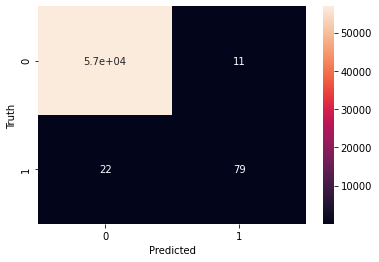

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

ada_best = AdaBoostClassifier(n_estimators=250, learning_rate=1, random_state=0)
ada_best.fit(X_train, y_train)
y_pred = ada_best.predict(X_test)

print('Recall:', np.round(recall_score(y_test, y_pred), 3))
print('Precision:', np.round(precision_score(y_test, y_pred), 3))
print('F1 score:', np.round(f1_score(y_test, y_pred), 3), '\n')

# Grafico la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Clasificación utilizando Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grid_params = {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [1]}
gs = GridSearchCV(GradientBoostingClassifier(random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
for key, value in gs.cv_results_.items():
    print(key, ':', value)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


mean_fit_time : [149.91130171]
std_fit_time : [21.36293555]
mean_score_time : [0.06579266]
std_score_time : [0.00955847]
param_learning_rate : [0.1]
param_max_depth : [1]
param_n_estimators : [100]
params : [{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}]
split0_test_score : [0.73202614]
split1_test_score : [0.73611111]
split2_test_score : [0.69620253]
split3_test_score : [0.73611111]
split4_test_score : [0.71621622]
mean_test_score : [0.72333342]
std_test_score : [0.01541974]
rank_test_score : [1]


El tiempo es razonablemente bajo como para probar varias configuraciones. Por ahora pruebo valores menores a 100 para analizar cómo influye el resto de los parámetros.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': [20, 50, 80], 'learning_rate': [0.1, 0.4, 0.7], 'max_depth': [1, 2, 3]}
gs = GridSearchCV(GradientBoostingClassifier(random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 57.1min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 169.4min finished


In [ ]:
import numpy as np
print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Learning rate:', gs.cv_results_['param_learning_rate'])
print('Max depth:', gs.cv_results_['param_max_depth'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

N° of estimators: [20 50 80 20 50 80 20 50 80 20 50 80 20 50 80 20 50 80 20 50 80 20 50 80
 20 50 80]
Learning rate: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
Max depth: [1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3]
Mean test score:     [0.723 0.723 0.723 0.647 0.642 0.642 0.77  0.759 0.759 0.723 0.723 0.723
 0.333 0.333 0.333 0.333 0.333 0.333 0.723 0.723 0.723 0.577 0.577 0.577
 0.451 0.451 0.451]
Std test score:      [0.015 0.015 0.015 0.16  0.158 0.158 0.019 0.023 0.023 0.015 0.015 0.015
 0.215 0.215 0.215 0.186 0.186 0.186 0.015 0.015 0.015 0.21  0.21  0.21
 0.286 0.286 0.286]
Mean fit time (min): [0.534 1.321 2.078 0.993 2.525 3.894 1.466 3.727 6.375 0.541 1.375 2.195
 1.056 2.539 3.927 1.435 3.588 5.758 0.486 1.265 1.987 0.962 2.411 3.847
 1.432 3.921 5.781]


Como se puede ver, el score parecería no depender del número de estimadores, y los otros dos hiperparámetros son codependientes. Entre estos dos, lo único claro es que disminuir el learning rate parecería mejorar el desempeño. Sigo probando otras combinaciones:

In [ ]:
grid_params = {'n_estimators': [5, 10, 20], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [1, 2, 3, 4]}
gs = GridSearchCV(GradientBoostingClassifier(random_state=0), grid_params, scoring='f1', verbose=1, cv=5, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
print('N° of estimators:', gs.cv_results_['param_n_estimators'])
print('Learning rate:', gs.cv_results_['param_learning_rate'])
print('Max depth:', gs.cv_results_['param_max_depth'])
print('Mean test score:    ', np.round(gs.cv_results_['mean_test_score'], 3))
print('Std test score:     ', np.round(gs.cv_results_['std_test_score'], 3))
print('Mean fit time (min):', np.round(gs.cv_results_['mean_fit_time']/60, 3))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 65.8min finished


N° of estimators: [5 10 20 5 10 20 5 10 20 5 10 20 5 10 20 5 10 20 5 10 20 5 10 20 5 10 20 5
 10 20 5 10 20 5 10 20]
Learning rate: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1]
Max depth: [1 1 1 2 2 2 3 3 3 4 4 4 1 1 1 2 2 2 3 3 3 4 4 4 1 1 1 2 2 2 3 3 3 4 4 4]
Mean test score:     [0.    0.    0.    0.    0.    0.    0.    0.005 0.101 0.    0.005 0.063
 0.    0.    0.    0.738 0.636 0.636 0.782 0.783 0.779 0.794 0.766 0.772
 0.723 0.723 0.723 0.599 0.647 0.647 0.716 0.762 0.77  0.77  0.71  0.772]
Std test score:      [0.    0.    0.    0.    0.    0.    0.    0.01  0.027 0.    0.01  0.042
 0.    0.    0.    0.034 0.101 0.101 0.046 0.051 0.052 0.03  0.063 0.052
 0.015 0.015 0.015 0.139 0.16  0.16  0.058 0.039 0.019 0.045 0.086 0.037]
Mean fit time (min): [0.131 0.26  0.518 0.256 0.518 1.009 0.377 0.776 1.551 0.503 1.005 2.06
 0.13  0.256 0.524 0.265 0.52  1.039

Los resultados del modelo parecerían no variar mucho con la cantidad de estimadores ni la máxima profundidad del árbol, pero sí con el learning rate. Aun así, todos los resultados son definitivamente más bajos que los obtenidos con Random Forest y AdaBoost, y son comparables con los del Perceptrón el cual es mucho más simple y rápido de entrenar. Por esto, no se cree que valga la pena seguir intentando con otras configuraciones de parámetros.

# Conclusión

Se abordó un problema de clasificación binario cuyas clases estaban altamente desbalanceadas y cuyo dataset era de un tamaño considerable. Se probaron diferentes modelos de clasificadores: SVM, Perceptrón, Random Forest, AdaBoost y Gradient Tree Boosting. En primer lugar resultó importante evaluar el tiempo de entrenamiento de cada algoritmo, ya que al no tener suficiente experiencia para elegir hiperparámetros adecuados para cada uno de ellos, se tuvo que utilizar GridSearch en un amplio rango de configuraciones. Esto implica que si el algoritmo es muy lento, el tiempo de entrenamiento hace inviable utilizar GridSearch (principalmente por utilizar Colab y disponer de un tiempo reducido).

En cuanto a los resultados, Random Forest fue el que mejores resultados dio (f1=0.851 en set de testeo), seguido por AdaBoost (f1=0.827 en set de testeo), luego por Gradient Tree Boosting (f1=0.794 en cross-validation) y finalmente por Perceptrón (f1=0.756 en cross-validation). SVM no fue considerado porque el tiempo de ejecución resultó demasiado elevado: con n_jobs=1 se esperó por 1:30hs y no terminó, y con n_jobs>1 terminaba a los 47min pero la celda nunca se terminaba de ejecutar. Para este último caso una alternativa podría haber sido utilizar GridSearch para buscar los mejores hiperparámetros en un subconjunto del dataset y luego entrenar con el dataset completo. Esto podría no asegurar que los hiperparámetros sean los mejores, ya que las clases estaban demasiado desbalanceadas y cualquier muestreo de los casos que son fraude podría sesgar el modelo.

Los resultados obtenidos parecen razonables, aunque con ciertas dudas en el caso de Gradient Tree Boosting. Este algoritmo tiene mayor flexibilidad y robustez frente a overfitting que AdaBoost [1], por lo que a priori parecía que debía dar mejores resultados. Puede haber pasado que no se buscó de manera correcta los mejores hiperparámetros o bien que realmente AdaBoost es mejor para este dataset en particular.

Como conclusión final, estos algoritmos muestran un trade-off entre tiempo de entrenamiento, memoria utilizada, robustez al overfitting y exactitud. Estos aspectos resultan importantes cuando el dataset tiene un tamaño considerable.

